In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install hydrascreen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 25.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.3 which is incompatible.


In [ ]:
!pip install --upgrade hydrascreen

In [ ]:
from hydrascreen import login

login(
    email='rushankg@stanford.edu',
    organization='Stanford University'
    )

Sent verification email to rushankg@stanford.edu. Please check your email and use token provided to instantiate Hydrascreen class.


In [ ]:
token = "" #removed for security purposes

In [ ]:
from pathlib import Path
from hydrascreen.predictor import HydraScreen

ligand_array = [Path('/content/aspirin.sdf'), Path('/content/glycine.sdf'), Path('/content/fumarate.sdf'), Path('/content/fumaric_acid.sdf')]

predictor = HydraScreen(token)
results = predictor.predict_for_protein(
            protein_file=Path('/content/5mxa.pdb'),
            ligand_files=ligand_array
            )

In [ ]:
results.ligand_affinity

,pdb_id,ligand_id,ligand_affinity
0,5mxa,aspirin,2.991
2,5mxa,fumarate,3.227
4,5mxa,fumaric_acid,2.792
6,5mxa,glycine,2.332


Dockstring

In [ ]:
!pip install dockstring

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 32.7 MB/s eta 0:00:00


In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 18.1 MB/s eta 0:00:00


In [ ]:
!pip install openbabel-wheel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 11.2 MB/s eta 0:00:00


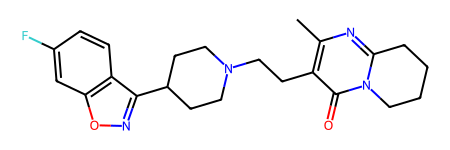

In [ ]:
import rdkit.Chem as Chem

# Risperidone is an antipsychotic drug used to treat schizophrenia and bipolar disorder
risperidone = 'CC1=C(C(=O)N2CCCCC2=N1)CCN3CCC(CC3)C4=NOC5=C4C=CC(=C5)F'
Chem.MolFromSmiles(risperidone)

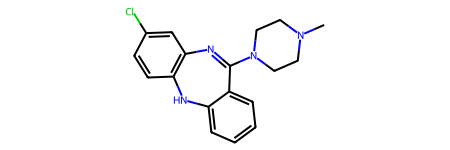

In [ ]:
clozapine = "CN1CCN(CC1)C2=NC3=C(C=CC(=C3)Cl)NC4=CC=CC=C42"
Chem.MolFromSmiles(clozapine)

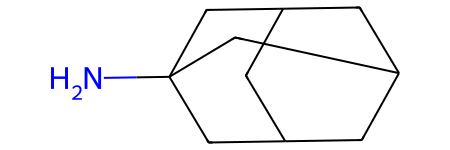

In [ ]:
amantadine = "C1C2CC3CC1CC(C2)(C3)N"
Chem.MolFromSmiles(amantadine)

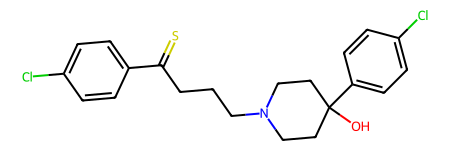

In [ ]:
haloperidol = "C1CN(CCC1(C2=CC=C(C=C2)Cl)O)CCCC(=S)C3=CC=C(C=C3)Cl"
Chem.MolFromSmiles(haloperidol)

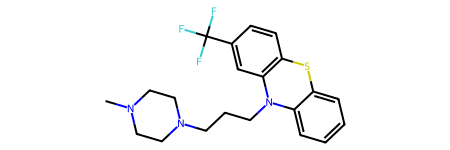

In [ ]:
trifluoperazine = "CN1CCN(CC1)CCCN2C3=CC=CC=C3SC4=C2C=C(C=C4)C(F)(F)F"
Chem.MolFromSmiles(trifluoperazine)

In [ ]:
from dockstring import load_target
target = load_target('DRD2')

In [ ]:
score1

-11.0

In [ ]:
valency_table = {'N':'P', 'Cl':'F', 'F':'Cl', 'S':'O'}

def try_variations(drug):
  base_score, base_aux = target.dock(drug)
  print("Baseline score is "+str(base_score)+" "+drug+"\n")
  for elem in valency_table:
    num_occur = drug.count(elem)
    print(elem+": "+str(num_occur))
    for i in range(1, num_occur+1):
      new_drug = drug.replace(elem, valency_table[elem], i)
      score, aux = target.dock(new_drug)
      print("Score of drug where "+str(i)+" "+elem+" has/have been replaced with "+valency_table[elem]+" is "+str(score))
      print(new_drug)
      print()

In [ ]:
try_variations(clozapine)

Baseline score is -8.6 CN1CCN(CC1)C2=NC3=C(C=CC(=C3)Cl)NC4=CC=CC=C42

N: 4
Score of drug where 1 N have been replaced with P is -8.5
CP1CCN(CC1)C2=NC3=C(C=CC(=C3)Cl)NC4=CC=CC=C42

Score of drug where 2 N have been replaced with P is -8.4
CP1CCP(CC1)C2=NC3=C(C=CC(=C3)Cl)NC4=CC=CC=C42



[07:55:40] UFFTYPER: Warning: hybridization set to SP3 for atom 8


Score of drug where 3 N have been replaced with P is -8.5
CP1CCP(CC1)C2=PC3=C(C=CC(=C3)Cl)NC4=CC=CC=C42



[07:56:16] UFFTYPER: Warning: hybridization set to SP3 for atom 8


Score of drug where 4 N have been replaced with P is -8.7
CP1CCP(CC1)C2=PC3=C(C=CC(=C3)Cl)PC4=CC=CC=C42

Cl: 1
Score of drug where 1 Cl have been replaced with F is -8.5
CN1CCN(CC1)C2=NC3=C(C=CC(=C3)F)NC4=CC=CC=C42

F: 0
S: 0


In [ ]:
from dockstring import load_target
import rdkit.Chem as Chem
THRESHOLD = 500

def screen(df, targetname):
  best_scores = {}
  num_drugs_tested = 0
  for i in range(len(df)):
    print(i)
    mol = df.iloc[i,0]
    if mol=='':
      continue
    wt = Chem.Descriptors.ExactMolWt(Chem.MolFromSmiles(mol))
    print(wt)
    if wt<THRESHOLD:
      target = load_target(targetname)
      try:
        score, aux = target.dock(mol)
      except:
        continue
      num_drugs_tested+=1
      print(mol+": "+str(score))
      if len(best_scores) < 5:
        best_scores[mol] = score
      elif score < max(best_scores.values()):
        key = max(best_scores, key=best_scores.get)
        best_scores.pop(key)
        best_scores[mol] = score
  return best_scores

List of drugs:
https://www.cureffi.org/wp-content/uploads/2013/10/drugs.txt

In [ ]:
df = pd.read_csv('/content/drugs.txt', on_bad_lines='skip')
todrop = []
for i in range(len(df)):
  text = df.iloc[i,0]
  textlist = text.split('\t')
  if len(textlist)<2:
    todrop.append(i)
  else:
    df.iloc[i,0] = textlist[2]

best = screen(df, 'DRD2')

0
286.154209196
NC1=NC2=C(N=CN2[C@@H]2C[C@H](CO)C=C2)C(NC2CC2)=N1: -8.1
1
2
3
4
391.25112929600004
CC(=O)O[C@H]1CC[C@]2(C)C3CC[C@@]4(C)C(CC=C4C4=CN=CC=C4)C3CC=C2C1: -9.0
5
181.040878832
CC(=O)NCCCS(O)(=O)=O: -5.2
6
645.2480135359999
7
336.204907376
CCCC(=O)NC1=CC(C(C)=O)=C(OCC(O)CNC(C)C)C=C1: -8.0
8
353.08993719999995
CC(=O)CC(C1=CC=C(C=C1)[N+]([O-])=O)C1=C(O)C2=CC=CC=C2OC1=O: -8.2
9
326.14528432399993
CN(C)CCCN1C2=CC=CC=C2SC2=C1C=C(C=C2)C(C)=O: -7.8
10
326.145284324
CC(CN1C2=CC=CC=C2SC2=C1C=C(C=C2)C(C)=O)N(C)C: -8.3
11
151.063328528
CC(=O)NC1=CC=C(O)C=C1: -6.5
12
221.988132052
CC(=O)NC1=NN=C(S1)S(N)(=O)=O: -6.2
13
59.01385291591001
CC([O-])=O: -3.1
14
324.11437811999997
CC(=O)C1=CC=C(C=C1)S(=O)(=O)NC(=O)NC1CCCCC1: -8.7
15
75.0320284
CC(=O)NO: -4.1
16
411.198048168
CC(=O)C1=CC=C2SC3=C(C=CC=C3)N(CCCN3CCN(CCO)CC3)C2=C1: -9.0
17
163.030314148
CC(=O)N[C@@H](CS)C(O)=O: -4.6
18
806.445256792
19
180.042258736
CC(=O)OC1=CC=CC=C1C(O)=O: -6.2
20
326.18819469199997
COC1=C(C)C(C)=C(\C=C\C(\C)=C\C=

[23:31:45] Explicit valence for atom # 5 O, 3, is greater than permitted


101
254.996617204
ClC1=CC=C2N=C3NC(=O)CN3CC2=C1Cl: -7.8
102
103
293.16404560800004
CC(C)(C#N)C1=CC(=CC(CN2C=NC=N2)=C1)C(C)(C)C#N: -7.5
104
1139.506293876
105
352.215078136
CCOC(=O)C1(CCN(CCC2=CC=C(N)C=C2)CC1)C1=CC=CC=C1: -8.4
106
252.078644244
COC1=CC=C(C=C1)C1C(=O)C2=CC=CC=C2C1=O: -9.2
107
361.16164136400005
108
109
265.157897608
C(N(CC1=CC=CC=C1)C1=CC=CC=C1)C1=NCCN1: -7.2
110
111
188.094963004
CN1N(C(=O)C=C1C)C1=CC=CC=C1: -6.9
112
113
588.1959953920001
114
459.19065428
COC1=CC=C(C=C1)N1N=C(C(N)=O)C2=C1C(=O)N(CC2)C1=CC=C(C=C1)N1CCCCC1=O: -10.4
115
267.125928784
[H][C@]12CC3=C(C(O)=C(O)C=C3)C3=CC=CC(CCN1C)=C23: -8.9
116
244.02825167999998
NC1=CC(Cl)=C(NC2=NCCN2)C(Cl)=C1: -5.9
117
534.150188072
118
322.24089896
CCN(CC)CCCN(C1CC2=CC=CC=C2C1)C1=CC=CC=C1: -7.9
119
210.100442308
CC(C)C1(CC=C)C(=O)NC(=O)NC1=O: -6.3
120
121
552.3118916079999
122
317.162708216
O[C@@H](CNCCCCC1=CC=C(O)C=C1)C1=CC(O)=C(O)C=C1: -8.8
123
124
1134.0069952840004
125
344.173607248
COC1=CC=C(C[C@@H](C)NC[C@H](O)C2=CC(N

[01:22:54] Explicit valence for atom # 25 N, 4, is greater than permitted


359.1492636439999
CCCCCOC(=O)NC1=NC(=O)N(C=C1F)[C@@H]1O[C@H](C)[C@@H](O)[C@H]1O: -8.4
252
1320.6983941159992
253
254
217.07726434
C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O: -5.4
255
182.0822054
256
236.094963004
NC(=O)N1C2=CC=CC=C2C=CC2=CC=CC=C12: -8.7
257
378.0885572959999
[H][C@]12SC(C)(C)[C@@H](N1C(=O)[C@H]2NC(=O)C(C(O)=O)C1=CC=CC=C1)C(O)=O: -7.8
258
987.4847876480001
259
244.105921612
260
186.04629856
CCOC(=O)N1C=CN(C)C1=S: -5.0
261
290.11859090800004
CN(C)CCOC(C1=CC=C(Cl)C=C1)C1=CC=CC=N1: -6.7
262
371.04449796399996
263
489.33016746399994
264
719.4257991640001
265
190.05897142
NC(=O)N[C@@H](CCC(O)=O)C(O)=O: -5.5
266
260.173607248
CCCC(C)(COC(N)=O)COC(=O)NC(C)C: -6.7
267
213.007181888
ClCCNC(=O)N(CCCl)N=O: -5.5
268
411.198048168
CCC(=O)C1=CC2=C(SC3=C(C=CC=C3)N2CCN2CCN(CCO)CC2)C=C1: -8.2
269
273.05565630399997
CC(C(O)=O)C1=CC2=C(C=C1)C1=C(N2)C=CC(Cl)=C1: -9.5
270
292.178692628
CC(C)(C)NCC(O)COC1=CC=CC2=C1CCC(=O)N2: -7.7
271
406.189257312
COC1=CC=CC=C1OCCNCC(O)COC1=CC=CC2=C1C1=CC=CC=C1N2: -8.

[02:05:19] WARNING: not removing hydrogen atom without neighbors


299
383.035810516
[H][C@]12SCC=C(N1C(=O)[C@H]2NC(=O)C(=N/OC)\C1=CSC(N)=N1)C(O)=O: -7.2
300
554.0460579160001
301
424.0688844719999
[H][C@]12SCC(COC(N)=O)=C(N1C(=O)[C@H]2NC(=O)C(=N/OC)\C1=CC=CO1)C(O)=O: -7.6
302
381.07588234799994
CC1=CC=C(C=C1)C1=CC(=NN1C1=CC=C(C=C1)S(N)(=O)=O)C(F)(F)F: -9.2
303
347.09397702399997
[H][C@]12SCC(C)=C(N1C(=O)[C@H]2NC(=O)[C@H](N)C1=CC=CC=C1)C(O)=O: -7.5
304
405.099456328
[H][C@]12SCC(COC(C)=O)=C(N1C(=O)[C@H]2NC(=O)[C@H](N)C1=CC=CC=C1)C(O)=O: -7.2
305
423.055877264
[H][C@]12SCC(COC(C)=O)=C(N1C(=O)[C@H]2NC(=O)CSC1=CC=NC=C1)C(O)=O: -7.9
306
307
223.120843404
CC=CCC=CCCC(=O)[C@H]1O[C@H]1C(N)=O: -6.8
308
1351.4485383559997
309
388.15537034000005
OC(=O)COCCN1CCN(CC1)C(C1=CC=CC=C1)C1=CC=C(Cl)C=C1: -8.4
310
1429.6698183039996
311
312
199.103085164
CC1O[C@@]2(CS1)CN1CCC2CC1: -6.0
313
392.29265975999994
[H][C@@]1(CC[C@@]2([H])[C@]3([H])[C@H](O)C[C@]4([H])C[C@H](O)CC[C@]4(C)[C@@]3([H])CC[C@]12C)[C@H](C)CCC(O)=O: -9.7
314
289.12334194
CN(C)CCC(O)(C1=CC=CC=C1)C1=CC=CC=

[02:55:46] UFFTYPER: Unrecognized hybridization for atom: 1
[02:55:46] UFFTYPER: Unrecognized atom type: Pt+2 (1)
[02:55:46] UFFTYPER: Unrecognized hybridization for atom: 1
[02:55:46] UFFTYPER: Unrecognized atom type: Pt+2 (1)


355
324.163791512
CN(C)CCCC1(OCC2=C1C=CC(=C2)C#N)C1=CC=C(F)C=C1: -8.1
356
285.06286692400005
NC1=C2N=CN([C@H]3C[C@H](O)[C@@H](CO)O3)C2=NC(Cl)=N1: -7.8
357
747.476891268
358
199.048072388
[H][C@@]12CC(=O)N1[C@@H](C(O)=O)\C(O2)=C\CO: -5.4
359
343.170292132
CN1CCC[C@@H]1CCO[C@](C)(C1=CC=CC=C1)C1=CC=C(Cl)C=C1: -7.8
360
276.07961855599996
CC(C)(C)NCC(O)C1=CC(Cl)=C(N)C(Cl)=C1: -6.5
361
455.09024281599994
CCCC(=O)OCOC(=O)C1=C(C)NC(C)=C(C1C1=CC=CC(Cl)=C1Cl)C(=O)OC: -7.7
362
352.19072011209
C[N@@+]12CC[C@@H](CC1)C(C2)OC(=O)C(O)(C1=CC=CC=C1)C1=CC=CC=C1: -8.4
363
424.1798708359999
CCC[C@@H]1C[C@H](N(C)C1)C(=O)NC(C(C)Cl)[C@H]1O[C@H](SC)[C@H](O)[C@@H](O)[C@H]1O: -7.2
364
300.066555336
CN1C2=C(C=C(Cl)C=C2)N(C2=CC=CC=C2)C(=O)CC1=O: -8.1
365
410.166015276
[H][C@@]12C[C@H](C)[C@](O)(C(=O)CCl)[C@@]1(C)C[C@H](O)[C@@]1(F)[C@@]2([H])CCC2=CC(=O)C=C[C@]12C: -7.8
366
410.166015276
[H][C@@]12C[C@@H](C)[C@H](C(=O)CO)[C@@]1(C)C[C@H](O)[C@@]1(Cl)[C@@]2([H])C[C@H](F)C2=CC(=O)C=C[C@]12C: -7.9
367
243.886016468
OP(O

In [ ]:
print(best)